In [1]:
import matplotlib.pyplot as plt

from func.assets import *
from func.solver import SolverConfig, solve_scenario_external_ballistics_only

In [2]:
paths = AssetPaths(Path('.'))
scenario = load_scenario(paths, 'demo-1.yaml')
weapon = load_weapon(paths, scenario.weapon.id)
ammo = load_ammo(paths, scenario.ammo.id)
medium = load_medium(paths, scenario.environment.medium)

In [3]:
gravity = 9.79342  # Houston, TX
solver_config = SolverConfig(dt_s=0.01)

In [4]:
res = solve_scenario_external_ballistics_only(
  scenario=scenario,
  weapon=weapon,
  ammo=ammo,
  medium=medium,
  gravity_mps2=gravity,
  config=solver_config,
)

In [5]:
res.trajectory

,t_s,x_m,y_m,z_m,vx_mps,vy_mps,vz_mps,speed_mps,energy_j
0,0.00,0.000000,0.0,0.000000,909.445653,0.0,31.758542,910.000000,1656.200000
1,0.01,9.094457,0.0,0.317096,909.445653,0.0,31.660608,909.996587,1656.187578
2,0.02,18.188913,0.0,0.633212,909.445653,0.0,31.562674,909.993185,1656.175195
3,0.03,27.283370,0.0,0.948349,909.445653,0.0,31.464739,909.989794,1656.162850
4,0.04,36.377826,0.0,1.262507,909.445653,0.0,31.366805,909.986413,1656.150543
...,...,...,...,...,...,...,...,...,...
106,1.06,964.012392,0.0,28.162111,909.445653,0.0,21.377517,909.696869,1655.096786
107,1.07,973.106848,0.0,28.375397,909.445653,0.0,21.279583,909.694573,1655.088431
108,1.08,982.201305,0.0,28.587703,909.445653,0.0,21.181648,909.692287,1655.080114
109,1.09,991.295761,0.0,28.799030,909.445653,0.0,21.083714,909.690012,1655.071836


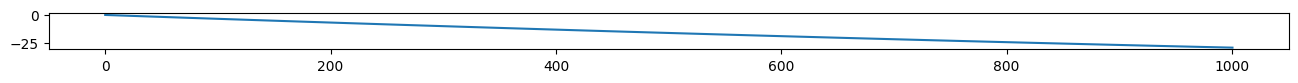

In [ ]:
fig, ax = plt.subplots()

ax.plot(
  res.trajectory['x_m'],
  res.trajectory['z_m']
)

fig.set_size_inches(16, 6)
ax.set_aspect('equal', adjustable='box')

In [7]:
res.trajectory['z_m'].max()

np.float64(29.009377099203416)